In [2]:
import pandas as pd

In [20]:
tdata = pd.read_csv('train.csv')
tdata['Response'] = tdata['Response'].apply(lambda x : 'Y' if x==1 else 'N')
tdata.Vehicle_Age = tdata.Vehicle_Age.apply(lambda x : x.replace('<','lt').replace('>','gt'))
tdata['Policy_Sales_Channel'] = tdata['Policy_Sales_Channel'].astype('category')
tdata['Region_Code'] = tdata['Region_Code'].astype('category')
tdata['Vintage'] = tdata['Vintage'].astype('category')

In [33]:
tdata.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,gt 2 Years,Yes,40454.0,26.0,217,Y
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,N
2,3,Male,47,1,28.0,0,gt 2 Years,Yes,38294.0,26.0,27,Y
3,4,Male,21,1,11.0,1,lt 1 Year,No,28619.0,152.0,203,N
4,5,Female,29,1,41.0,1,lt 1 Year,No,27496.0,152.0,39,N


In [1]:
from pycaret.classification import *

In [35]:
clf1 = setup(tdata,target='Response',fix_imbalance=True,high_cardinality_features = ['Policy_Sales_Channel','Vintage'])

Setup Succesfully Completed!


,Description,Value
0,session_id,1169
1,Target Type,Binary
2,Label Encoded,"N: 0, Y: 1"
3,Original Data,"(381109, 12)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,True
9,High Cardinality Method,frequency


In [24]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ridge Classifier,0.8775,0.0000,0.0001,0.3000,0.0002,0.0002,0.0055,2.2805
1,Gradient Boosting Classifier,0.8773,0.8547,0.0002,0.1089,0.0004,0.0001,0.0002,188.7606
2,Light Gradient Boosting Machine,0.8773,0.8560,0.0062,0.4583,0.0123,0.0090,0.0416,2.2258
3,Ada Boost Classifier,0.8771,0.8514,0.0059,0.4033,0.0117,0.0082,0.0361,60.2992
4,CatBoost Classifier,0.8768,0.8558,0.0296,0.4612,0.0556,0.0414,0.0918,34.3998
5,Extreme Gradient Boosting,0.8767,0.8539,0.0185,0.4302,0.0355,0.0257,0.0682,69.9930
6,Logistic Regression,0.8760,0.8357,0.0064,0.2623,0.0125,0.0067,0.0229,5.9209
7,Linear Discriminant Analysis,0.8755,0.8436,0.0172,0.3436,0.0327,0.0212,0.0528,19.0887
8,Random Forest Classifier,0.8684,0.7836,0.0948,0.3599,0.1500,0.1042,0.1321,6.0769
9,K Neighbors Classifier,0.8594,0.6396,0.0753,0.2534,0.1161,0.0634,0.0775,63.3768


In [25]:
best

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=6097,
                solver='auto', tol=0.001)

In [36]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [40]:
xgbst = create_model('xgboost',tree_method='gpu_hist',max_depth=20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8598,0.8349,0.1606,0.3451,0.2192,0.1533,0.1669
1,0.8585,0.8336,0.1606,0.3373,0.2176,0.1505,0.1631
2,0.8629,0.8390,0.1667,0.3682,0.2295,0.1658,0.1816
3,0.8611,0.8359,0.1621,0.3545,0.2225,0.1577,0.1723
4,0.8594,0.8369,0.1663,0.3466,0.2247,0.1578,0.1708
5,0.8594,0.8359,0.1678,0.3479,0.2264,0.1593,0.1722
6,0.8619,0.8399,0.1697,0.3642,0.2316,0.1666,0.1814
7,0.8580,0.8335,0.1613,0.3355,0.2179,0.1502,0.1625
8,0.8607,0.8327,0.1670,0.3547,0.2271,0.1613,0.1752
9,0.8582,0.8323,0.1709,0.3425,0.2280,0.1594,0.1712


In [56]:
dt = create_model('dt',)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5933,0.7909,0.8822,0.2160,0.3471,0.1870,0.2854
1,0.5862,0.7899,0.8853,0.2134,0.3439,0.1825,0.2818
2,0.6002,0.7964,0.8815,0.2190,0.3508,0.1922,0.2902
3,0.5944,0.7909,0.8857,0.2171,0.3487,0.1890,0.2882
4,0.5847,0.7914,0.8834,0.2126,0.3428,0.1809,0.2797
5,0.5871,0.7949,0.8869,0.2141,0.3449,0.1837,0.2834
6,0.5868,0.7903,0.8842,0.2136,0.3441,0.1827,0.2817
7,0.5880,0.7821,0.8628,0.2111,0.3392,0.1772,0.2705
8,0.5890,0.7813,0.8769,0.2135,0.3434,0.1822,0.2792
9,0.5895,0.7937,0.8804,0.2142,0.3446,0.1836,0.2815


In [57]:
tmm = tune_model(dt,optimize='F1',n_iter=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5933,0.7909,0.8822,0.2160,0.3471,0.1870,0.2854
1,0.5862,0.7899,0.8853,0.2134,0.3439,0.1825,0.2818
2,0.6002,0.7964,0.8815,0.2190,0.3508,0.1922,0.2902
3,0.5944,0.7909,0.8857,0.2171,0.3487,0.1890,0.2882
4,0.5847,0.7914,0.8834,0.2126,0.3428,0.1809,0.2797
5,0.5871,0.7949,0.8869,0.2141,0.3449,0.1837,0.2834
6,0.5868,0.7903,0.8842,0.2136,0.3441,0.1827,0.2817
7,0.5880,0.7821,0.8628,0.2111,0.3392,0.1772,0.2705
8,0.5890,0.7813,0.8769,0.2135,0.3434,0.1822,0.2792
9,0.5895,0.7937,0.8804,0.2142,0.3446,0.1836,0.2815


In [49]:
predict_model(tmm)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Label,Score
0,1,Male,44,1,28.0,0,gt 2 Years,Yes,40454.0,26.0,217,Y,Y,1.0000
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,N,N,0.0000
2,3,Male,47,1,28.0,0,gt 2 Years,Yes,38294.0,26.0,27,Y,Y,0.6667
3,4,Male,21,1,11.0,1,lt 1 Year,No,28619.0,152.0,203,N,N,0.0000
4,5,Female,29,1,41.0,1,lt 1 Year,No,27496.0,152.0,39,N,N,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,N,N,0.0000
381105,381106,Male,30,1,37.0,1,lt 1 Year,No,40016.0,152.0,131,N,N,0.0000
381106,381107,Male,21,1,30.0,1,lt 1 Year,No,35118.0,160.0,161,N,N,0.0000
381107,381108,Female,68,1,14.0,0,gt 2 Years,Yes,44617.0,124.0,74,N,N,0.0000


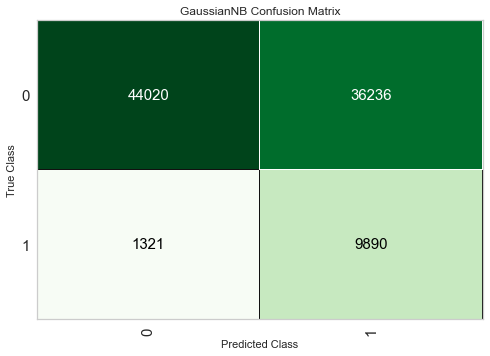

In [52]:
plot_model(dt,plot='confusion_matrix')

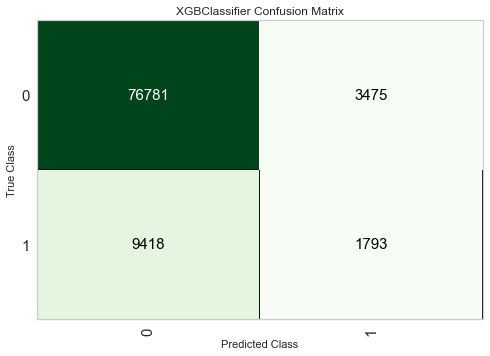

In [41]:
plot_model(xgbst,plot='confusion_matrix')